# Sales Transaction Analysis by Product and Employee

### Distribution of Products Sold

In [1]:
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# File to Load (Remember to change these)
employee_data_to_load = "Resources_final/employees_Modified.csv"
product_data_to_load = "Resources_final/products_Modified.csv"
sales_data_to_load = "Resources_final/sales_Modified.csv"

# Read the City and Ride Data
employee_df = pd.read_csv(employee_data_to_load)
product_df = pd.read_csv(product_data_to_load)
sales_df = pd.read_csv(sales_data_to_load)

# Join Data
product_sales_df = pd.merge(product_df, sales_df, 
                      how='outer', on='ProductID')

employee_sales_df = pd.merge(employee_df, sales_df,
                       left_on='EmployeeID', right_on='SalesPersonID')

# Adjust Price Formatting
product_sales_df['Price'][0]
reg = re.compile(',')
product_sales_df['Price'] = product_sales_df['Price'].apply(lambda s: reg.sub('', s))
product_sales_df['Price'] = (product_sales_df['Price'].astype(float)) / 100000

# Print DataFrmes
# product_sales_df.head()
# employee_sales_df.head()

In [2]:
#Set variables & create dataframe

by_product = product_sales_df.groupby(['ProductName'])
quantity_per_txn = by_product.mean()['Quantity']
price_by_product = by_product.mean()['Price']
transactions = by_product.count()['SalesID']

rev_per_txn = quantity_per_txn * price_by_product
total_volume = quantity_per_txn * transactions
total_revenue = transactions * rev_per_txn

revenue_by_product_df = pd.DataFrame({
    "Total Transactions" : transactions,
    "Quantity/Transaction" : quantity_per_txn,
    "Price/Product": price_by_product,
    "Total Sales Volume" : total_volume,
    "Total Revenue": total_revenue,
    "Rev/Transaction": rev_per_txn
})

stats_by_product_df = revenue_by_product_df.reset_index()
stats_by_product_df.head()

,ProductName,Total Transactions,Quantity/Transaction,Price/Product,Total Sales Volume,Total Revenue,Rev/Transaction
0,Anchovy Paste - 56 G Tube,2313,12.828361,4.08967,29672.0,121348.68824,52.463765
1,"Appetizer - Mini Egg Roll, Shrimp",2419,13.302604,0.71436,32179.0,22987.39044,9.502848
2,Appetizer - Mushroom Tart,2271,13.121973,0.38859,29800.0,11579.98200,5.099067
3,Appetizer - Sausage Rolls,2271,13.059886,4.81907,29659.0,142928.79713,62.936502
4,Apricots - Dried,2402,12.939217,8.79023,31080.0,273200.34840,113.738696


### Top 10 Products by Revenue/Transaction

In [3]:
high_value_df = stats_by_product_df.sort_values(["Rev/Transaction"], ascending=False).head(10)
high_value_df

,ProductName,Total Transactions,Quantity/Transaction,Price/Product,Total Sales Volume,Total Revenue,Rev/Transaction
56,Bread - Calabrese Baguette,2176,13.427390,9.85978,29218.0,288083.05204,132.391108
451,Zucchini - Yellow,2379,13.284573,9.84644,31604.0,311186.88976,130.805754
299,Puree - Passion Fruit,2325,13.100215,9.88263,30458.0,301005.14454,129.464578
332,Shrimp - 31/40,2336,12.906250,9.98755,30149.0,301114.64495,128.901817
379,Tia Maria,2354,13.018267,9.82471,30645.0,301078.23795,127.900696
29,Beef - Inside Round,2380,12.823950,9.93193,30521.0,303132.43553,127.366570
387,Tuna - Salad Premix,2285,13.143982,9.68781,30034.0,290963.68554,127.336405
393,Vanilla Beans,2303,12.921407,9.78435,29758.0,291162.68730,126.427567
211,Lettuce - Treviso,2276,13.008787,9.64127,29608.0,285458.72216,125.421231
184,Ice Cream Bar - Oreo Cone,2310,13.141991,9.54065,30358.0,289635.05270,125.383140


### Bottom 10 Products by Revenue/Transaction

In [4]:
low_value_df = stats_by_product_df.sort_values(["Rev/Transaction"], ascending=False).tail(10)
low_value_df

,ProductName,Total Transactions,Quantity/Transaction,Price/Product,Total Sales Volume,Total Revenue,Rev/Transaction
152,Flavouring - Orange,2337,12.963629,0.06932,30296.0,2100.11872,0.898639
340,"Sole - Dover, Whole, Fresh",2400,12.911667,0.06846,30988.0,2121.43848,0.883933
360,Steam Pan - Half Size Deep,2215,12.991422,0.05736,28776.0,1650.59136,0.745188
171,Grapes - Red,2362,12.906859,0.05125,30486.0,1562.40750,0.661477
271,Pastry - Raisin Muffin - Mini,2376,13.165825,0.04278,31282.0,1338.24396,0.563234
5,Apricots - Halves,2262,13.244474,0.03735,29959.0,1118.96865,0.494681
377,Thermometer Digital,2264,13.074205,0.03265,29600.0,966.44000,0.426873
34,Beef - Striploin Aa,2317,12.747518,0.02389,29536.0,705.61504,0.304538
67,Bread Crumbs - Japanese Style,2380,13.347479,0.00449,31767.0,142.63383,0.059930
98,Chef Hat 20cm,2304,12.976128,0.00418,29897.0,124.96946,0.054240


### Product Price vs. Total Sales Volume

Total sales volume does not decrease as price increases

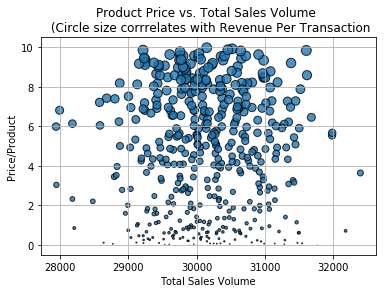

In [5]:
# Build a scatter plot for each data type
plt.scatter(
    stats_by_product_df["Total Sales Volume"], stats_by_product_df["Price/Product"],
    s = stats_by_product_df["Rev/Transaction"]*.75,
    marker="o", 
    c='tab:blue',
    edgecolors='black',
    alpha=.8
)

# Incorporate the other graph properties
plt.title("Product Price vs. Total Sales Volume \n (Circle size corrrelates with Revenue Per Transaction")
plt.ylabel("Price/Product")
plt.xlabel("Total Sales Volume")
plt.grid(True)
# Incorporate a text label regarding circle size


# Save the figure
# plt.savefig("output_data/price_vs_volume_data.png")

# Show plot
plt.show()

### Average Quanity Sold per Sale of a Product by Employee

In [6]:
per_ee = employee_sales_df.groupby(['FirstName','LastName'])
quantity_sold_per_ee = per_ee.sum()['Quantity']
sales_trxns_per_ee = per_ee.count()['SalesID']

trxn_size_per_ee = quantity_sold_per_ee / sales_trxns_per_ee

sales_stats_per_ee_df = pd.DataFrame({
    "Quantity Sold": quantity_sold_per_ee,
    "Transactions": sales_trxns_per_ee,
    "Quantity per Sale": trxn_size_per_ee,
})

quantity_per_sale_ee_df = sales_stats_per_ee_df.reset_index()
quantity_per_sale_ee_df

,FirstName,LastName,Quantity Sold,Transactions,Quantity per Sale
0,Bernard,Moody,588409,45305,12.987728
1,Chadwick,Cook,596994,45892,13.008673
2,Chadwick,Walton,595448,45687,13.033204
3,Christine,Palmer,590380,45361,13.015145
4,Daphne,King,598951,45802,13.076962
5,Darnell,Nielsen,595951,45847,12.998691
6,Desiree,Stuart,590465,45534,12.967563
7,Devon,Brewer,598511,46082,12.987956
8,Holly,Collins,592572,45603,12.994145
9,Janet,Flowers,592226,45497,13.016814


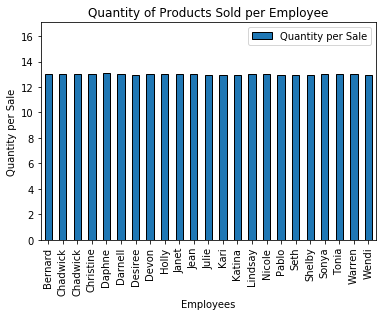

In [7]:
# Create a bar chart based upon the above data
quantity_per_sale_ee_df.plot(kind="bar",x = "FirstName",y = "Quantity per Sale", color="tab:blue", align="center", edgecolor="black")

# Sets the x limits of the current chart
plt.xlim(-.5, len(per_ee)-.5)

# Set the limits of the y axis
plt.ylim(0, max(trxn_size_per_ee)+4)

# Give the chart a title, x label, and y label
plt.title("Quantity of Products Sold per Employee")
plt.xlabel("Employees")
plt.ylabel("Quantity per Sale")

plt.show()

### Count of Transactions by Employee

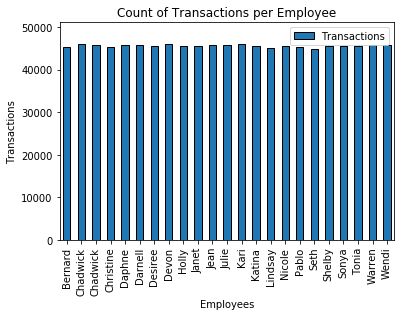

In [8]:
# Create a bar chart based upon the above data
quantity_per_sale_ee_df.plot(kind="bar",x = "FirstName",y = "Transactions", color="tab:blue", align="center", edgecolor="black")

# Sets the x limits of the current chart
plt.xlim(-.5, len(per_ee)-.5)

# Set the limits of the y axis
plt.ylim(0, max(sales_trxns_per_ee)+5000)

# Give the chart a title, x label, and y label
plt.title("Count of Transactions per Employee")
plt.xlabel("Employees")
plt.ylabel("Transactions")

plt.show()